In [1]:
%matplotlib inline

import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

af = np.loadtxt('LHS_af.csv', delimiter=',')
rr = np.loadtxt('robustness.csv', delimiter=',')

In [ ]:
print(np.corrcoef(rr[:,1] - rr[:,0], af[:,1])[0,1])
print(np.corrcoef(rr[:,1] - rr[:,0], af[:,0])[0,1])


-0.1841154992288675
-0.5506895722141112


In [11]:
lm0 = LinearRegression().fit(af[:,0].reshape(-1, 1), rr[:,0]-rr[:,1])
lm1 = LinearRegression().fit(af[:,1].reshape(-1, 1), rr[:,0]-rr[:,1])
lm2 = LinearRegression().fit(af[:,0].reshape(-1, 1), rr[:,0])
lm3 = LinearRegression().fit(af[:,1].reshape(-1, 1), rr[:,0])

In [12]:
lm0.coef_, lm1.coef_, lm2.coef_, lm3.coef_

(array([2.77710349]),
 array([0.92841906]),
 array([-2.98187994]),
 array([0.04405851]))

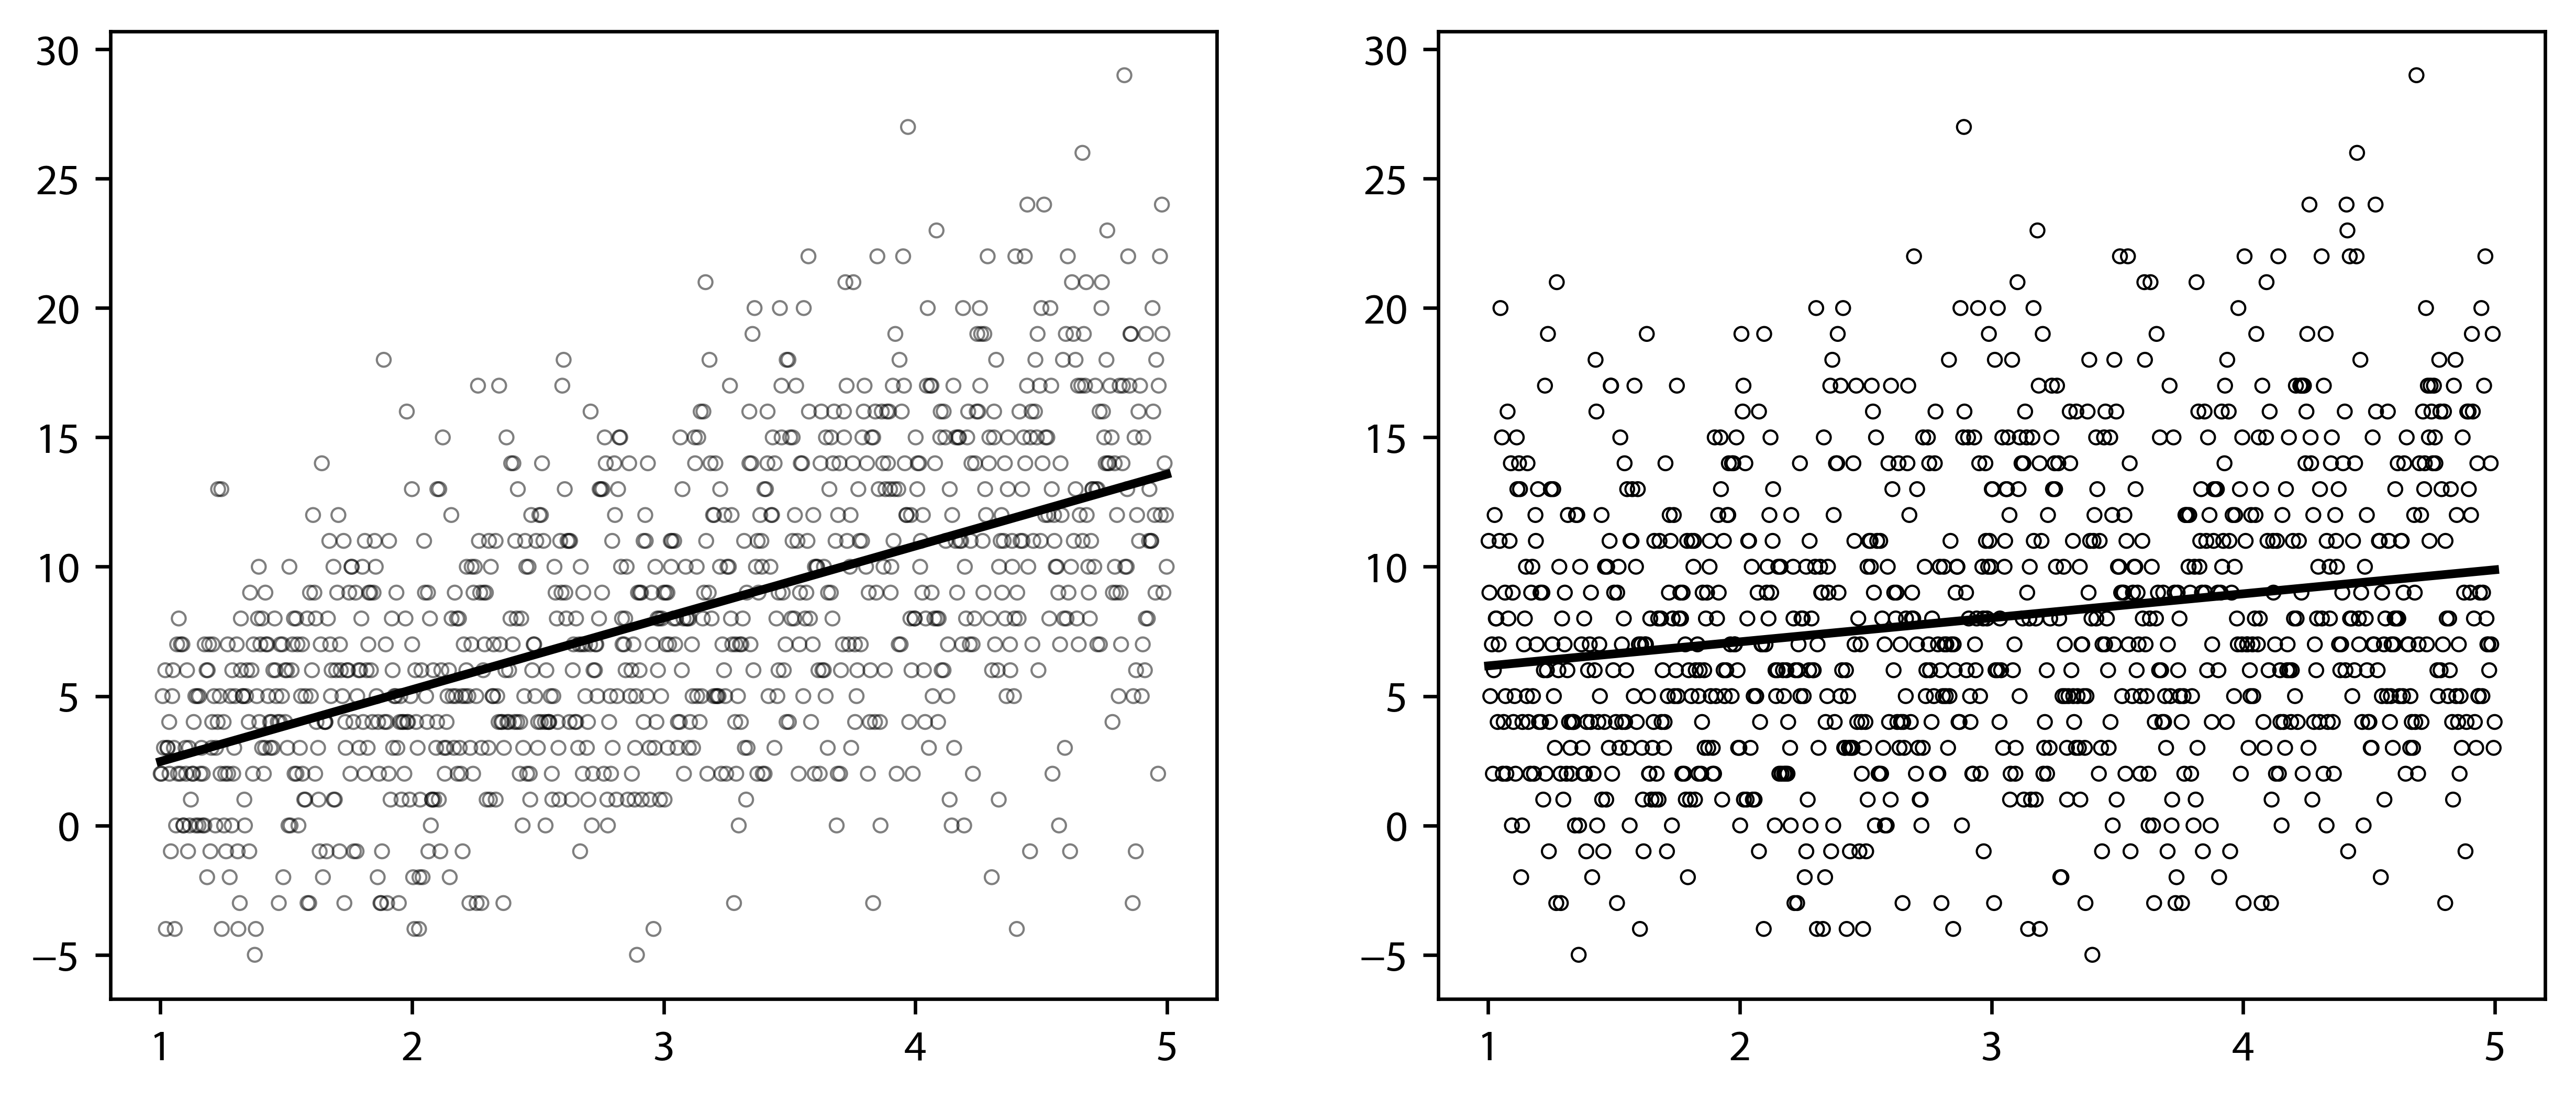

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(af[:,0], rr[:,0]-rr[:,1], marker='o', s=10, facecolors='none', edgecolors='black', linewidth=0.5, alpha=0.5)
lm0 = LinearRegression().fit(af[:,0].reshape(-1, 1), rr[:,0]-rr[:,1])
xx = np.array([np.min(af[:,0]), np.max(af[:,0])]).reshape(-1, 1)
fit_ = lm0.predict(xx)
ax[0].plot(xx, fit_, color='black', linewidth=2)
ax[1].scatter(af[:,1], rr[:,0]-rr[:,1], marker='o', s=10, facecolors='none', edgecolors='black', linewidth=0.5)
lm1 = LinearRegression().fit(af[:,1].reshape(-1, 1), rr[:,0]-rr[:,1])
xx = np.array([np.min(af[:,1]), np.max(af[:,1])]).reshape(-1, 1)
fit_ = lm1.predict(xx)
ax[1].plot(xx, fit_, color='black', linewidth=2)

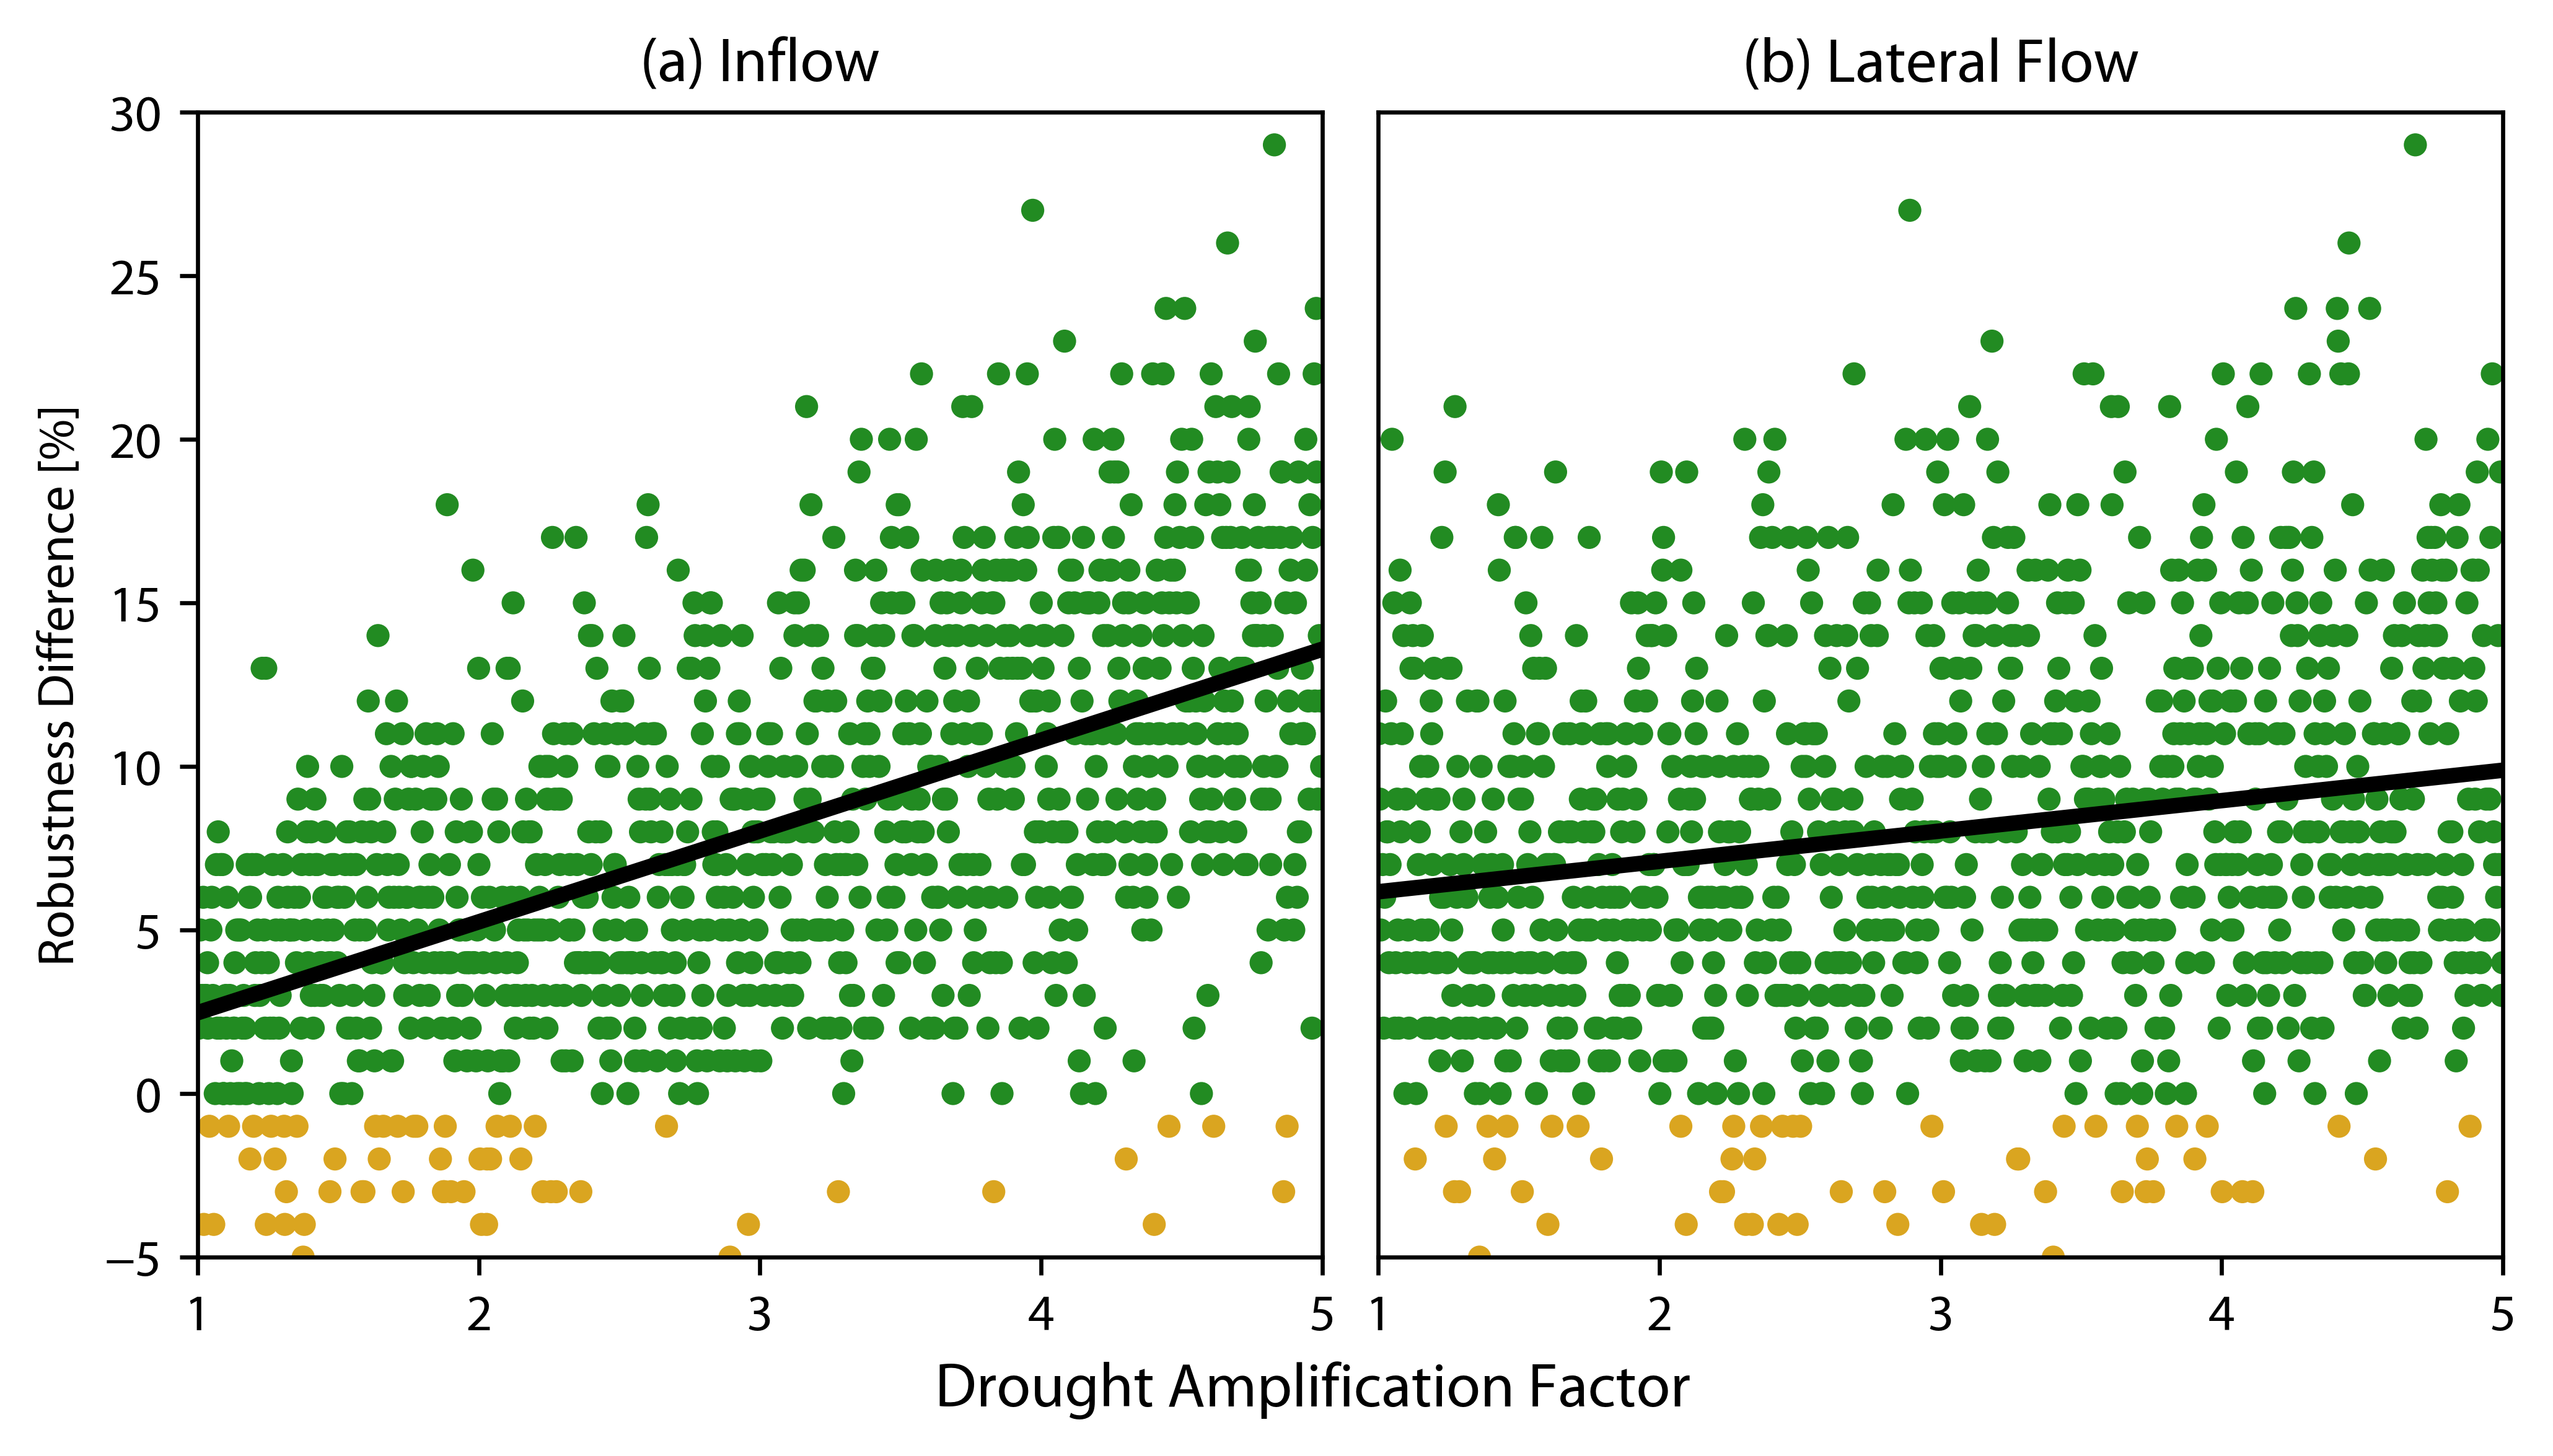

In [9]:


fig, ax = plt.subplots(1, 2, figsize=(8, 4))
rr_diff = rr[:, 0] - rr[:, 1]
# find indices of positive rr_diff
idx_pos = np.where(rr_diff >= 0)[0]
idx_neg = np.where(rr_diff < 0)[0]
# First subplot
ax[0].scatter(af[idx_pos, 0], rr_diff[idx_pos], marker='o', s=20, facecolors='forestgreen', edgecolors='none', linewidth=0.5)
ax[0].scatter(af[idx_neg, 0], rr_diff[idx_neg], marker='o', s=20, facecolors='goldenrod', edgecolors='none', linewidth=0.5)
lm0 = LinearRegression().fit(af[:, 0].reshape(-1, 1), rr[:, 0] - rr[:, 1])
xx = np.array([np.min(af[:, 0]), np.max(af[:, 0])]).reshape(-1, 1)
fit_ = lm0.predict(xx)
ax[0].plot(xx, fit_, color='black', linewidth=3)

# Second subplot
ax[1].scatter(af[idx_pos, 1], rr_diff[idx_pos], marker='o', s=20, facecolors='forestgreen', edgecolors='none', linewidth=0.5)
ax[1].scatter(af[idx_neg, 1], rr_diff[idx_neg], marker='o', s=20, facecolors='goldenrod', edgecolors='none', linewidth=0.5)
lm1 = LinearRegression().fit(af[:, 1].reshape(-1, 1), rr[:, 0] - rr[:, 1])
xx = np.array([np.min(af[:, 1]), np.max(af[:, 1])]).reshape(-1, 1)
fit_ = lm1.predict(xx)
ax[1].plot(xx, fit_, color='black', linewidth=3)

# Ensure both subplots share the same YTicks and YLabel
ax[1].set_yticks([])  # Turn off YTicks on the right subplot
ax[0].set_ylabel('Robustness Difference [%]')  # Set the YLabel on the left subplot
ax[0].set_title('(a) Inflow')
ax[1].set_title('(b) Lateral Flow')


for ax_ in ax:
    ax_.set_xticks([1, 2, 3, 4, 5])  # Set the XTicks
    ax_.set_xticklabels(['1', '2', '3', '4', '5'])  # Set the XTickLabels
    ax_.set_ylim(-5, 30)  # Set the YLim
    ax_.set_xlim(1, 5)  # Set the XLim
# Add shared Xlabel
fig.text(0.5, 0.01, 'Drought Amplification Factor', ha='center', fontsize=12)
plt.subplots_adjust(wspace=0.05)
plt.show()

In [11]:
lm0.coef_, lm1.coef_

(array([2.77710349]), array([0.92841906]))

In [16]:
np.corrcoef((af[:,1], rr_diff))

array([[1.       , 0.1841155],
       [0.1841155, 1.       ]])